In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.svm import SVC
import pylab
import time
import random
import matplotlib.pyplot as plt


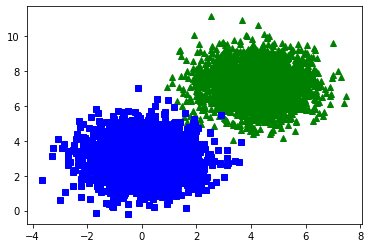

In [2]:
# import matplotlib.pyplot as plt
from sklearn import datasets
seed1 = 1
X1, y1 = datasets.make_blobs(n_samples=5000, centers=2, n_features=2, center_box=(0, 10), random_state = seed1)
plt.plot(X1[:, 0][y1 == 0], X1[:, 1][y1 == 0], 'g^')
plt.plot(X1[:, 0][y1 == 1], X1[:, 1][y1 == 1], 'bs')
plt.show()

C:\Users\t910571\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\t910571\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\t910571\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

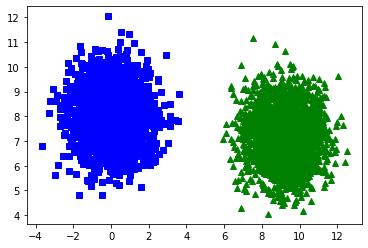

In [3]:
df = pd.DataFrame(X1, columns = ['feature1','feature2'])
df['label'] = y1

ones = df[df.label==1]


ones['feature1'] = ones['feature1'] 
ones['feature2'] = ones['feature2'] + 5

zeros = df[df.label==0]

zeros['feature1'] = zeros['feature1'] +5
zeros['feature2'] = zeros['feature2'] 

df = pd.concat([ones,zeros])

X2 = df[['feature1','feature2']].values
y2 = df['label'].values

plt.plot(X2[:, 0][y2 == 0], X2[:, 1][y2 == 0], 'g^')
plt.plot(X2[:, 0][y2 == 1], X2[:, 1][y2 == 1], 'bs')
plt.show()

C:\Users\t910571\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\t910571\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\t910571\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

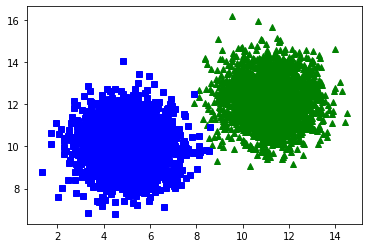

In [4]:
df = pd.DataFrame(X2, columns = ['feature1','feature2'])
df['label'] = y2

ones = df[df.label==1]


ones['feature1'] = ones['feature1'] + 5
ones['feature2'] = ones['feature2'] + 2

zeros = df[df.label==0]

zeros['feature1'] = zeros['feature1'] +2
zeros['feature2'] = zeros['feature2'] +5

df = pd.concat([ones,zeros])

X3 = df[['feature1','feature2']].values
y3 = df['label'].values

plt.plot(X3[:, 0][y3 == 0], X3[:, 1][y3 == 0], 'g^')
plt.plot(X3[:, 0][y3 == 1], X3[:, 1][y3 == 1], 'bs')
plt.show()

In [6]:
X = np.vstack([X1,X2,X3])
y = np.hstack([y1,y2,y3])

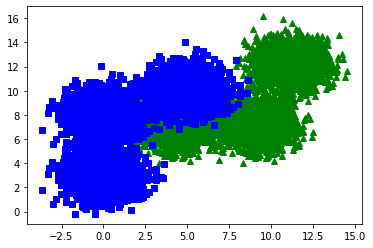

In [7]:
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def calc_marginal_density(model,X):
    w = model.coef_
    w = w.reshape(X.shape[1],)
    b = model.intercept_
    dp = abs(np.dot(X,w)+b)
    rho  = np.round(np.array(dp<1).sum() / X.shape[0],3)
    return rho

In [10]:
def train_model(X,y):
    seed = 369
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    model_new = SVC(kernel = 'linear' , C = 0.25, probability = True)
    model_new.fit(X_train, y_train)
    y_pred = model_new.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy after retraining: %.2f%%" % (accuracy * 100.0))
    return model_new, X_test

In [11]:
model, X_test = train_model(X1,y1)

Accuracy after retraining: 99.52%


In [12]:
model

SVC(C=0.25, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

## Monitor rho with changing data set

In [13]:
#initial model train
model, X_test = train_model(X1,y1)

Accuracy after retraining: 99.52%


In [14]:
print('initial marginal density ' , calc_marginal_density(model,X1))

initial marginal density  0.008


In [17]:
rho_min = calc_marginal_density(model,X1)

<IPython.core.display.Javascript object>


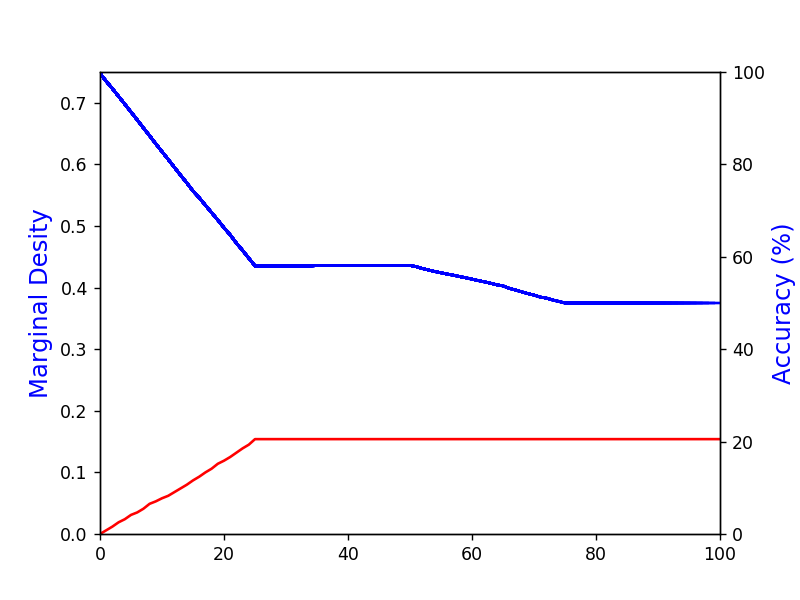

In [20]:
batch_size = 100
window_size = 5000
# fig = plt.figure(figsize=(10,20))
fig = plt.figure()
ax  = fig.add_subplot(111)
ax2=ax.twinx()
plt.ion()

fig.show()
fig.canvas.draw()

densities = []
acc = []
rho_max = rho_min
for i in range(int((X.shape[0]-window_size)/batch_size)+1):
#     print(i*batch_size)
#     print(((i*batch_size)+window_size))
    X2 = X[(i*batch_size):((i*batch_size)+window_size)]
    y2 = y[(i*batch_size):((i*batch_size)+window_size)]
    rho = calc_marginal_density(model,X2)
    if  (rho > rho_max):
        rho_max = rho
    
    densities.append(rho_max -rho_min)
    y2_pred = model.predict(X2)
    acc.append((100*accuracy_score(y2, y2_pred)))
    ax.clear()
    ax.set_xlim([0,int((X.shape[0]-window_size)/batch_size)])
    ax2.set_xlim([0,int((X.shape[0]-window_size)/batch_size)])
    ax.set_ylim([0,0.75])
    ax2.set_ylim([0,100])
    ax.plot(range(len(densities)),densities, color = 'red')
    ax.set_ylabel("Marginal Desity",color="blue",fontsize=14)
    ax2.plot(range(len(acc)),acc, color = 'blue')
    ax2.set_ylabel("Accuracy (%)",color="blue",fontsize=14)

    fig.canvas.draw()
    plt.pause(0.0000001)
    